## $Linear-Regression$

The mathematical equation of a line:
# $y = mx + c$

- Please plot this line using matplotlib

Imagine we have data related to `salary` vs `years_of_experience`
- let's use:
    - x = Independent Variable (years_of_experience)
    - y = Dependent Variable (salary)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

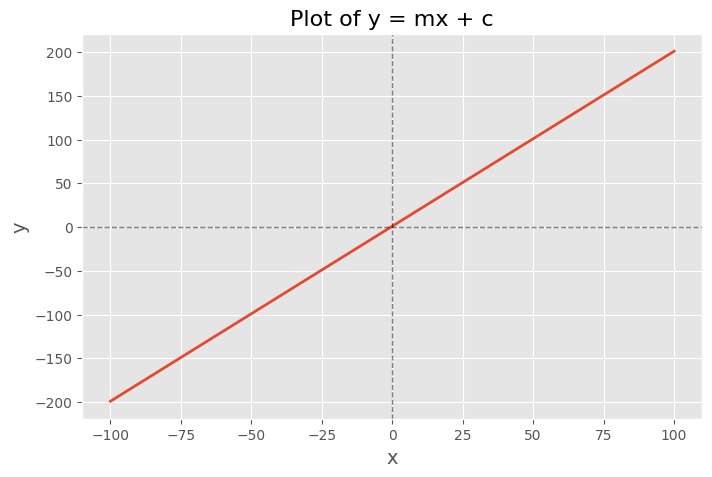

In [35]:
m = 2
c = 1
 
x = np.linspace(-100, 100, 100)
y = m * x + c
 
plt.plot(x, y)


plt.axhline(0, color= 'black' , linestyle='--', linewidth=1, alpha = 0.5) # horizontal line
plt.axvline(0, color='black', linestyle='--', linewidth=1, alpha = 0.5) # Vertical line

plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = mx + c")
plt.show()

- In machine learning, we see it like this:

$$\hat{y} = \beta_0 + \beta_1x_1$$

$$y = mx + c$$

$$\hat{y} = Ax + B$$

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

Exercise:
- Use the House price prediction dataset 
- use two features
- take a single feature:  (AveRooms - AveBedrms)* 144 = **AveArea** (average area in sq ft keeping 12 x 12 as average room dimensions)
- use the **MedHouseVal**
- Implement linear regression on this

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [43]:
# data import acquisition
cali = fetch_california_housing()

X_df = pd.DataFrame(cali.data, columns = cali.feature_names)

- Linear Regression, using:
    - x = Area feature ---- Feature Creation
    - y = House Price
    - 
    - create a model that predicts the house price

In [46]:
X_df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AveArea
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,858.285714
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,758.340949


In [58]:
# feature creation
# (rooms - bedrooms) * 144
X_df['AveArea'] = (X_df.AveRooms - X_df.AveBedrms)*144

# feature selection
X = pd.DataFrame(X_df.AveArea)
y = cali.target

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [60]:
# modeling training and testing
model = LinearRegression()

# train the model
model.fit(X_train, y_train)

# predictions on it
predictions = model.predict(X_test)

# test/ evaluate
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions) ** 0.5

r2 = r2_score(y_test, predictions)

In [62]:
# print the results
print("============== Linear Regressor Scores ===========")
print(f"Mean Squared Error: ------------> {mse*100:.2f}")
print(f"Mean Absolute Error: ------------> {rmse*100:.2f}")
print(f"R2 Error: ------------> {r2*100:.2f}")

============== Linear Regressor Scores ===========
Mean Squared Error: ------------> 127.58
Mean Absolute Error: ------------> 112.95
R2 Error: ------------> 2.64


In [70]:
beta1 = model.coef_

beta0 = model.intercept_

print(beta0,beta1)

1.588597482633166 [0.00077367]


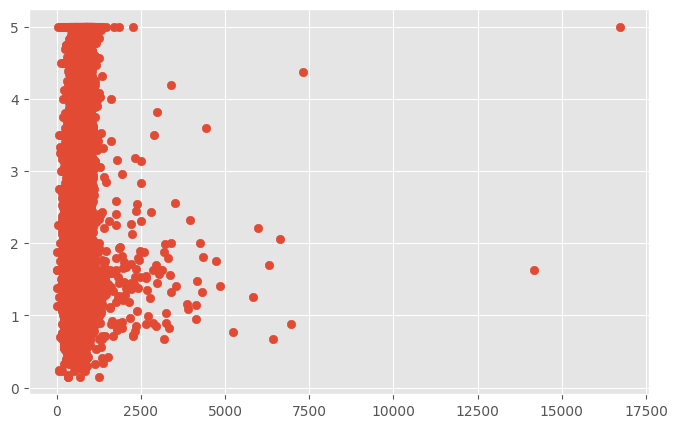

In [ ]:
# regression is based on a straight line of fit, let's plot it

plt.scatter(X['AveArea'],y)


plt.show()

In [ ]:
import seaborn as sns

sns.regplot(X.AveArea)

ValueError: need at least one array to concatenate